In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sys

In [2]:
df = pd.read_csv('airport.csv')
del df["time_of_day"]
del df["booth_rate"]

In [3]:
df["us"] = df["us_avg_wait"]
df["non_us"] = df["non_us_avg_wait"]

In [4]:
df['label'] = 0
for index, row in df.iterrows():
    if row['all_avg_wait']>15:
        df.at[index,'label'] = 1
    else:
        df.at[index,'label'] = 0

In [5]:
X = df.iloc[:,22:34]
y = df.iloc[:,-1] 

In [6]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs         Score
1      passengers  1.095464e+06
0    all_excluded  5.369469e+04
3          booths  2.476880e+03
2         flights  2.333207e+03
7   early morning  5.939148e+02
11   late evening  4.261540e+02
4           index  4.106641e+02
10  early evening  3.512501e+02
9       afternoon  3.197652e+02
5         weekend  4.636031e+01


[0.07660992 0.02375479 0.04174262 0.00335026 0.00060897 0.01265044
 0.00402637 0.00589949 0.00679998 0.00516464 0.27632696 0.54306557]


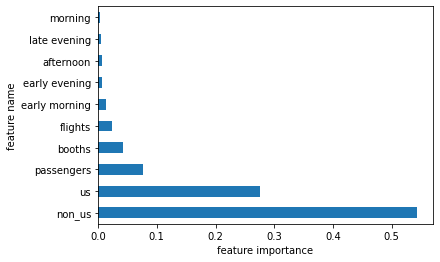

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('feature importance')
plt.ylabel('feature name')
plt.show()

In [5]:
X = df[[ "non_us", "us", "booths", "flights", "passengers", "early morning", "early evening"]].to_numpy()
y = df[['label']].to_numpy()
y = np.ravel(y)

In [6]:
X1 = df[[ "booths", "flights", "passengers", "early morning", "early evening"]].to_numpy()
y1 = df[['label']].to_numpy()
y1 = np.ravel(y1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [8]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_train_list = []
index = []
tree_test_list = []
for i in range(100):
    index.append(i+ 1)
    tree = DecisionTreeClassifier(max_depth=i + 1)
    tree.fit(X_train, y_train)
    tree_test_list.append(tree.score(X_test, y_test)) 
    tree_train_list.append(tree.score(X_train, y_train)) 

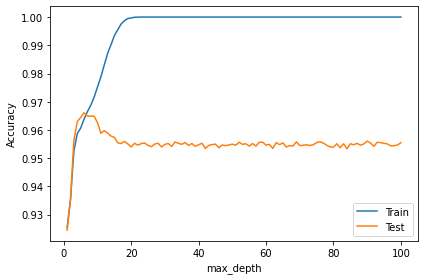

In [ ]:
plt.plot(index, tree_train_list, label='Train')
plt.plot(index, tree_test_list, label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.tight_layout()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_train_list1 = []
index1 = []
tree_test_list1 = []
for i in range(100):
    index1.append(i+ 1)
    tree = DecisionTreeClassifier(max_depth=i + 1)
    tree.fit(X1_train, y1_train)
    tree_test_list1.append(tree.score(X1_test, y1_test)) 
    tree_train_list1.append(tree.score(X1_train, y1_train)) 

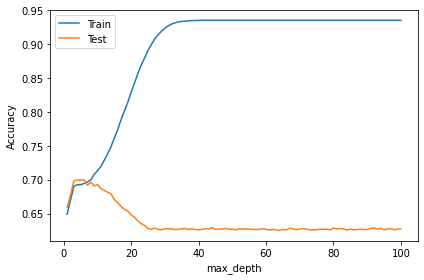

In [ ]:
plt.plot(index, tree_train_list1, label='Train')
plt.plot(index, tree_test_list1, label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title("Decision tree Hyperparameter Tuning")
plt.tight_layout()

Text(0.5, 1.0, 'With Residency')

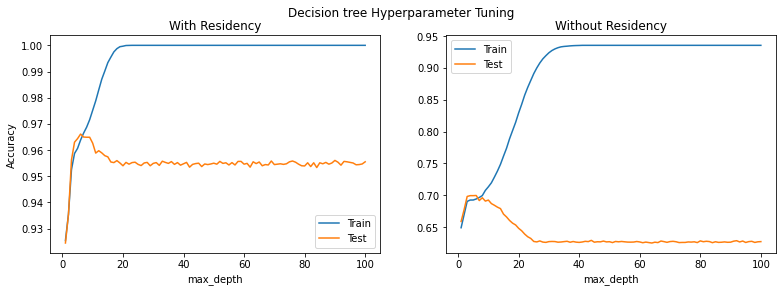

In [ ]:
fig, (ax2, ax1) = plt.subplots(1, 2,figsize=(13,4))
fig.suptitle("Decision tree Hyperparameter Tuning")
ax1.plot(index, tree_train_list1, label='Train')
ax1.plot(index, tree_test_list1, label='Test')
ax1.legend(loc='best', numpoints=1)
ax1.set_xlabel('max_depth')
ax1.set_title("Without Residency")
ax2.plot(index, tree_train_list, label='Train')
ax2.plot(index, tree_test_list, label='Test')
ax2.legend(loc='best', numpoints=1)
ax2.set_xlabel('max_depth')
ax2.set_ylabel('Accuracy')
ax2.set_title("With Residency")

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=123)

new_list = [None]
for i in range(20):
    new_list.append(i+1)
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': new_list
}

gs_tree = GridSearchCV(estimator=tree,
                  param_grid=param_grid_tree,
                  scoring='accuracy',
                  cv=10)

gs_tree.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs_tree.best_score_*100))
print('Best Params: %s' % gs_tree.best_params_)
print('Test Accuracy: %.2f%%' % (gs_tree.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 96.02%
Best Params: {'criterion': 'gini', 'max_depth': 6}
Test Accuracy: 96.61%


In [ ]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=123)

new_list = [None]
for i in range(20):
    new_list.append(i+1)
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': new_list
}

gs_tree1 = GridSearchCV(estimator=tree,
                  param_grid=param_grid_tree,
                  scoring='accuracy',
                  cv=10)

gs_tree1.fit(X1_train, y1_train)

print('Best Accuracy: %.2f%%' % (gs_tree1.best_score_*100))
print('Best Params: %s' % gs_tree1.best_params_)
print('Test Accuracy: %.2f%%' % (gs_tree1.best_estimator_.score(X1_test, y1_test)*100))

Best Accuracy: 69.23%
Best Params: {'criterion': 'gini', 'max_depth': 5}
Test Accuracy: 69.95%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_acc_tree = cross_val_score(estimator=gs_tree.best_estimator_,
                         X=X_train,
                         y=y_train,
                         cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc_tree)*100))

Kfold Accuracy: 96.11%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_acc_tree1 = cross_val_score(estimator=gs_tree1.best_estimator_,
                         X=X1_train,
                         y=y1_train,
                         cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc_tree1)*100))

Kfold Accuracy: 69.14%


In [ ]:
y_pred_tree = gs_tree.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
tree_conf = confusion_matrix(y_test, y_pred_tree)
print(tree_conf)
print(classification_report(y_test, y_pred_tree))

y_pred_tree1 = gs_tree1.best_estimator_.predict(X1_test)
from sklearn.metrics import classification_report, confusion_matrix
tree_conf1 = confusion_matrix(y1_test, y_pred_tree1)
print(tree_conf1)
print(classification_report(y1_test, y_pred_tree1))

[[8464  245]
 [ 203 4305]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      8709
           1       0.95      0.95      0.95      4508

    accuracy                           0.97     13217
   macro avg       0.96      0.96      0.96     13217
weighted avg       0.97      0.97      0.97     13217

[[8242  467]
 [3505 1003]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      8709
           1       0.68      0.22      0.34      4508

    accuracy                           0.70     13217
   macro avg       0.69      0.58      0.57     13217
weighted avg       0.70      0.70      0.65     13217



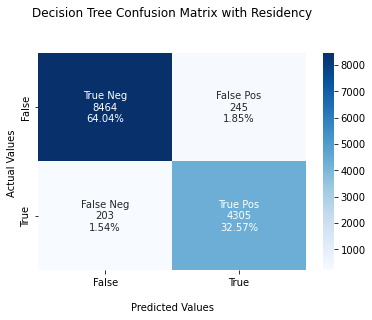

In [ ]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
tree_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
tree_conf.flatten()/np.sum(tree_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(tree_conf, annot=labels, fmt='', cmap='Blues')
ax.set_title('Decision Tree Confusion Matrix with Residency\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

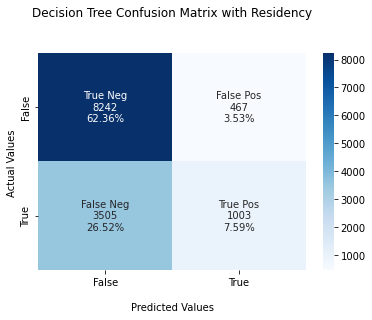

In [ ]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
tree_conf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
tree_conf1.flatten()/np.sum(tree_conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(tree_conf1, annot=labels, fmt='', cmap='Blues')
ax.set_title('Decision Tree Confusion Matrix with Residency\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=123)

param_grid_forest = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 20, 50, 100, 150],
    'max_depth': [1, 10, 50, 100, 150]
}

gs_forest = GridSearchCV(estimator=forest,
                  param_grid=param_grid_forest,
                  scoring='accuracy',
                  cv=10)

gs_forest.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs_forest.best_score_*100))
print('Best Params: %s' % gs_forest.best_params_)
print('Test Accuracy: %.2f%%' % (gs_forest.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 96.54%
Best Params: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
Test Accuracy: 96.97%


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=123)

param_grid_forest = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 20, 50, 100, 150],
    'max_depth': [1, 10, 50, 100, 150]
}

gs_forest1 = GridSearchCV(estimator=forest,
                  param_grid=param_grid_forest,
                  scoring='accuracy',
                  cv=10)

gs_forest1.fit(X1_train, y1_train)

print('Best Accuracy: %.2f%%' % (gs_forest1.best_score_*100))
print('Best Params: %s' % gs_forest1.best_params_)
print('Test Accuracy: %.2f%%' % (gs_forest1.best_estimator_.score(X1_test, y1_test)*100))

Best Accuracy: 69.52%
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
Test Accuracy: 70.31%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_acc_forest = cross_val_score(estimator=gs_forest.best_estimator_,
                         X=X_train,
                         y=y_train,
                         cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc_forest)*100))


cv_acc_forest1 = cross_val_score(estimator=gs_forest1.best_estimator_,
                         X=X1_train,
                         y=y1_train,
                         cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc_forest1)*100))


Kfold Accuracy: 96.44%
Kfold Accuracy: 69.49%


In [ ]:
y_pred_forest = gs_forest.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
forest_conf = confusion_matrix(y_test, y_pred_forest)
print(forest_conf)
print(classification_report(y_test, y_pred_forest))

y_pred_forest1 = gs_forest1.best_estimator_.predict(X1_test)
from sklearn.metrics import classification_report, confusion_matrix
forest_conf1 = confusion_matrix(y1_test, y_pred_forest1)
print(forest_conf1)
print(classification_report(y1_test, y_pred_forest1))

[[8488  221]
 [ 180 4328]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8709
           1       0.95      0.96      0.96      4508

    accuracy                           0.97     13217
   macro avg       0.97      0.97      0.97     13217
weighted avg       0.97      0.97      0.97     13217

[[7987  722]
 [3202 1306]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80      8709
           1       0.64      0.29      0.40      4508

    accuracy                           0.70     13217
   macro avg       0.68      0.60      0.60     13217
weighted avg       0.69      0.70      0.67     13217



In [21]:
forest_conf = np.array([[8488, 221],[180, 4328]])
forest_conf1 = np.array([[7987, 722],[3202, 1306]])

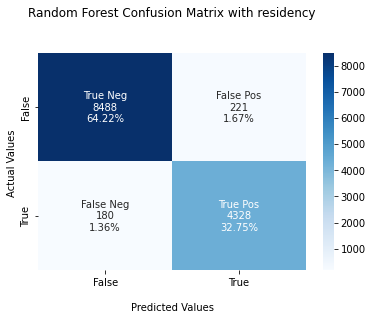

In [20]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
forest_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
forest_conf.flatten()/np.sum(forest_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(forest_conf, annot=labels, fmt='', cmap='Blues')
ax.set_title('Random Forest Confusion Matrix with residency\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

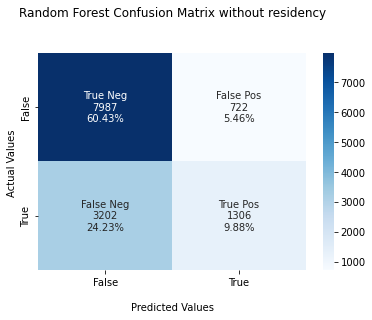

In [22]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
forest_conf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
forest_conf1.flatten()/np.sum(forest_conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(forest_conf1, annot=labels, fmt='', cmap='Blues')
ax.set_title('Random Forest Confusion Matrix without residency\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_train_list = []
index = []
knn_test_list = []
for i in range(100):
    index.append(i+ 1)
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=i + 1))])
    pipe.fit(X_train, y_train)
    knn_test_list.append(pipe.score(X_test, y_test)) 
    knn_train_list.append(pipe.score(X_train, y_train)) 

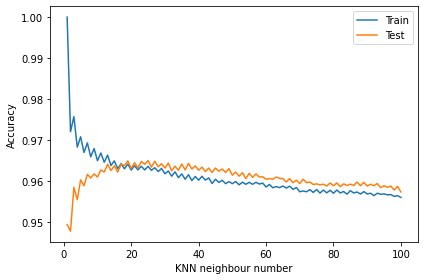

In [24]:
plt.plot(index, knn_train_list, label='Train')
plt.plot(index, knn_test_list, label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('KNN neighbour number')
plt.ylabel('Accuracy')
plt.tight_layout()

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_train_list1 = []
index1 = []
knn_test_list1 = []
for i in range(100):
    index1.append(i+ 1)
    pipe1 = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=i + 1))])
    pipe1.fit(X1_train, y1_train)
    knn_test_list1.append(pipe1.score(X1_test, y1_test)) 
    knn_train_list1.append(pipe1.score(X1_train, y1_train)) 

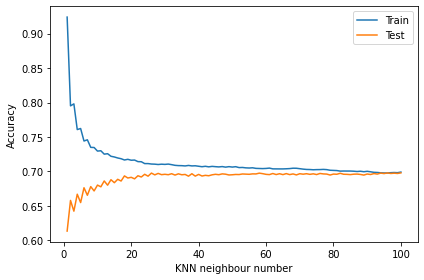

In [26]:
plt.plot(index1, knn_train_list1, label='Train')
plt.plot(index1, knn_test_list1, label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('KNN neighbour number')
plt.ylabel('Accuracy')
plt.tight_layout()

Text(0.5, 1.0, 'With Residency')

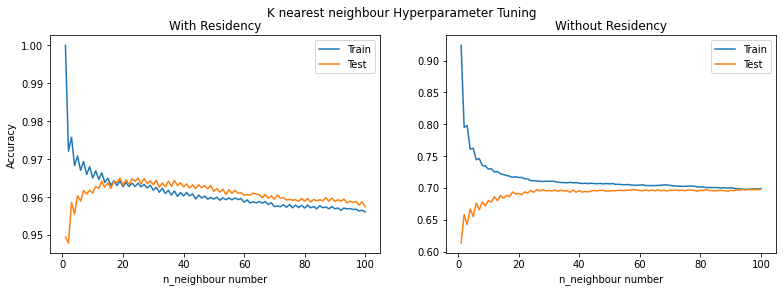

In [27]:
fig, (ax2, ax1) = plt.subplots(1, 2,figsize=(13,4))
fig.suptitle("K nearest neighbour Hyperparameter Tuning")
ax1.plot(index, knn_train_list1, label='Train')
ax1.plot(index, knn_test_list1, label='Test')
ax1.legend(loc='best', numpoints=1)
ax1.set_xlabel('n_neighbour number')
ax1.set_title("Without Residency")
ax2.plot(index, knn_train_list, label='Train')
ax2.plot(index, knn_test_list, label='Test')
ax2.legend(loc='best', numpoints=1)
ax2.set_xlabel('n_neighbour number')
ax2.set_ylabel('Accuracy')
ax2.set_title("With Residency")

In [28]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
new_list = []
for i in range(60):
    new_list.append(i+1)
param_grid = {
    'knn__n_neighbors': new_list
}

gs_knn = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs_knn.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs_knn.best_score_*100))
print('Best Params: %s' % gs_knn.best_params_)
print('Test Accuracy: %.2f%%' % (gs_knn.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 95.95%
Best Params: {'knn__n_neighbors': 21}
Test Accuracy: 96.45%


In [29]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
new_list = []
for i in range(60):
    new_list.append(i+1)
param_grid = {
    'knn__n_neighbors': new_list
}

gs_knn1 = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs_knn1.fit(X1_train, y1_train)

print('Best Accuracy: %.2f%%' % (gs_knn1.best_score_*100))
print('Best Params: %s' % gs_knn1.best_params_)
print('Test Accuracy: %.2f%%' % (gs_knn1.best_estimator_.score(X1_test, y1_test)*100))


Best Accuracy: 69.40%
Best Params: {'knn__n_neighbors': 55}
Test Accuracy: 69.59%


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_acc_knn = cross_val_score(estimator=gs_knn.best_estimator_,
                         X=X_train,
                         y=y_train,
                         cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc_knn)*100))

cv_acc_knn1 = cross_val_score(estimator=gs_knn1.best_estimator_,
                         X=X1_train,
                         y=y1_train,
                         cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc_knn1)*100))


Kfold Accuracy: 95.91%
Kfold Accuracy: 69.17%


In [31]:
y_pred_knn = gs_knn.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
knn_conf = confusion_matrix(y_test, y_pred_knn)
print(knn_conf)
print(classification_report(y_test, y_pred_knn))

y_pred_knn1 = gs_knn1.best_estimator_.predict(X1_test)
from sklearn.metrics import classification_report, confusion_matrix
knn_conf1 = confusion_matrix(y1_test, y_pred_knn1)
print(knn_conf1)
print(classification_report(y1_test, y_pred_knn1))

[[8531  178]
 [ 291 4217]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8709
           1       0.96      0.94      0.95      4508

    accuracy                           0.96     13217
   macro avg       0.96      0.96      0.96     13217
weighted avg       0.96      0.96      0.96     13217

[[7673 1036]
 [2983 1525]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      8709
           1       0.60      0.34      0.43      4508

    accuracy                           0.70     13217
   macro avg       0.66      0.61      0.61     13217
weighted avg       0.68      0.70      0.67     13217



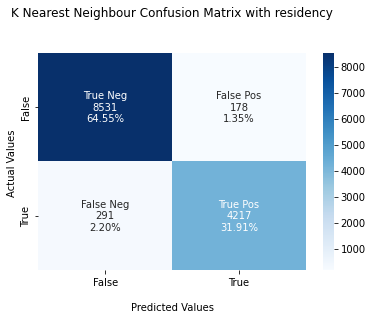

In [32]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
knn_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
knn_conf.flatten()/np.sum(knn_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(knn_conf, annot=labels, fmt='', cmap='Blues')
ax.set_title('K Nearest Neighbour Confusion Matrix with residency\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

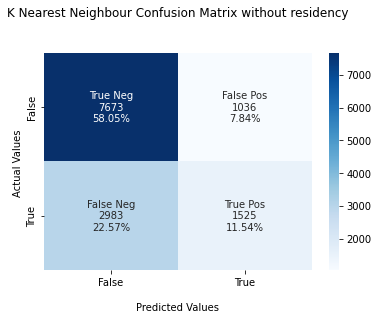

In [33]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
knn_conf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
knn_conf1.flatten()/np.sum(knn_conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(knn_conf1, annot=labels, fmt='', cmap='Blues')
ax.set_title('K Nearest Neighbour Confusion Matrix without residency\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

boost_train_list = []
index = []
boost_test_list = []
for i in range(50):
    index.append(i+ 1)
    boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False, max_depth = i +1)
    boost.fit(X_train, y_train)
    boost_test_list.append(boost.score(X_test, y_test)) 
    boost_train_list.append(boost.score(X_train, y_train)) 

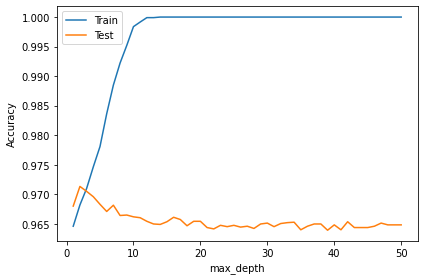

In [37]:
plt.plot(index, boost_train_list, label='Train')
plt.plot(index, boost_test_list, label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.tight_layout()

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

boost_train_list1 = []
index1 = []
boost_test_list1 = []
for i in range(50):
    index1.append(i+ 1)
    boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False, max_depth = i +1)
    boost.fit(X1_train, y1_train)
    boost_test_list1.append(boost.score(X1_test, y1_test)) 
    boost_train_list1.append(boost.score(X1_train, y1_train)) 

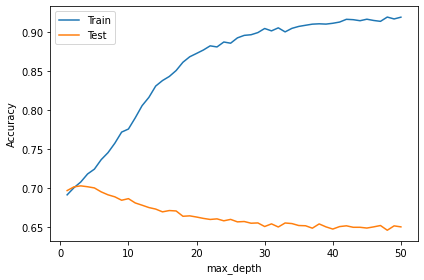

In [39]:
plt.plot(index, boost_train_list1, label='Train')
plt.plot(index, boost_test_list1, label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.tight_layout()

In [ ]:
fig, (ax2, ax1) = plt.subplots(1, 2,figsize=(13,4))
fig.suptitle("K nearest neighbour Hyperparameter Tuning")
ax1.plot(index, boost_train_list1, label='Train')
ax1.plot(index, boost_test_list1, label='Test')
ax1.legend(loc='best', numpoints=1)
ax1.set_xlabel('max_depth')
ax1.set_title("Without Residency")
ax2.plot(index, boost_train_list, label='Train')
ax2.plot(index, boost_test_list, label='Test')
ax2.legend(loc='best', numpoints=1)
ax2.set_xlabel('max_depth')
ax2.set_ylabel('Accuracy')
ax2.set_title("With Residency")

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False)

new_list = []
for i in range(20):
    new_list.append(i+1)
param_grid = {
    'max_depth': new_list,
    'learning_rate': [0.1, 0.01]
}

gs_boost = GridSearchCV(estimator=boost,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs_boost.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs_boost.best_score_*100))
print('Best Params: %s' % gs_boost.best_params_)
print('Test Accuracy: %.2f%%' % (gs_boost.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 96.54%
Best Params: {'learning_rate': 0.1, 'max_depth': 5}
Test Accuracy: 96.97%


In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False)

new_list = []
for i in range(20):
    new_list.append(i+1)
param_grid = {
    'max_depth': new_list,
    'learning_rate': [0.1, 0.01]
}

gs_boost1 = GridSearchCV(estimator=boost,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs_boost1.fit(X1_train, y1_train)

print('Best Accuracy: %.2f%%' % (gs_boost1.best_score_*100))
print('Best Params: %s' % gs_boost1.best_params_)
print('Test Accuracy: %.2f%%' % (gs_boost1.best_estimator_.score(X1_test, y1_test)*100))

Best Accuracy: 69.64%
Best Params: {'learning_rate': 0.1, 'max_depth': 5}
Test Accuracy: 70.39%


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_acc_boost = cross_val_score(estimator=gs_boost.best_estimator_,
                         X=X_train,
                         y=y_train,
                         cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc_boost)*100))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_acc_boost1 = cross_val_score(estimator=gs_boost1.best_estimator_,
                         X=X1_train,
                         y=y1_train,
                         cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                         n_jobs=-1)

print('Kfold Accuracy: %.2f%%' % (np.mean(cv_acc_boost1)*100))

Kfold Accuracy: 96.52%
Kfold Accuracy: 69.74%


In [44]:
y_pred_boost = gs_boost.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
boost_conf = confusion_matrix(y_test, y_pred_boost)
print(boost_conf)
print(classification_report(y_test, y_pred_boost))

y_pred_boost1 = gs_boost1.best_estimator_.predict(X1_test)
from sklearn.metrics import classification_report, confusion_matrix
boost_conf1 = confusion_matrix(y1_test, y_pred_boost1)
print(boost_conf1)
print(classification_report(y1_test, y_pred_boost1))

[[8481  228]
 [ 172 4336]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8709
           1       0.95      0.96      0.96      4508

    accuracy                           0.97     13217
   macro avg       0.97      0.97      0.97     13217
weighted avg       0.97      0.97      0.97     13217

[[7861  848]
 [3066 1442]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      8709
           1       0.63      0.32      0.42      4508

    accuracy                           0.70     13217
   macro avg       0.67      0.61      0.61     13217
weighted avg       0.69      0.70      0.67     13217



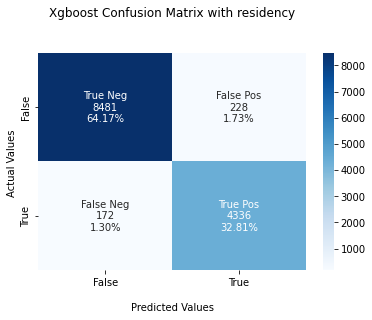

In [45]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
boost_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
boost_conf.flatten()/np.sum(boost_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(boost_conf, annot=labels, fmt='', cmap='Blues')
ax.set_title('Xgboost Confusion Matrix with residency\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

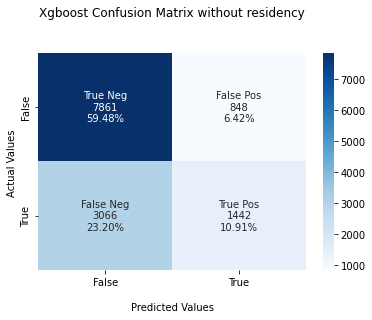

In [46]:

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
boost_conf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
boost_conf1.flatten()/np.sum(boost_conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(boost_conf1, annot=labels, fmt='', cmap='Blues')
ax.set_title('Xgboost Confusion Matrix without residency\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [47]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.9642884164333813


In [48]:
from sklearn import svm
clf1 = svm.SVC(kernel='linear')
clf1.fit(X1_train, y1_train)
y_pred_svm1 = clf.predict(X1_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y1_test, y_pred_svm1))

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_res = LogisticRegression(random_state=123)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

gs_log = GridSearchCV(estimator=log_res,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs_log.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs_log.best_score_*100))
print('Best Params: %s' % gs_log.best_params_)
print('Test Accuracy: %.2f%%' % (gs_log.best_estimator_.score(X_test, y_test)*100))

/home/kaylee/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kaylee/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Best Accuracy: 95.44%
Best Params: {'C': 0.001}
Test Accuracy: 95.26%


/home/kaylee/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_res = LogisticRegression(random_state=123)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

gs_log1 = GridSearchCV(estimator=log_res,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs_log1.fit(X1_train, y1_train)

print('Best Accuracy: %.2f%%' % (gs_log1.best_score_*100))
print('Best Params: %s' % gs_log1.best_params_)
print('Test Accuracy: %.2f%%' % (gs_log1.best_estimator_.score(X1_test, y1_test)*100))

/home/kaylee/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kaylee/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Best Accuracy: 69.36%
Best Params: {'C': 1}
Test Accuracy: 69.78%
